# Análises COVID-19

## Digital Innovation One

### Prof. Dr. Neylson Crepalde

Vamos analisar as séries temporais sobre a contaminação do vírus COVID-19 pelo mundo.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

Agora, vamos importar os dados. É importante já dizer no comando `pd.read_csv` quais são as colunas que serão "parseadas" como datas. O pandas possui métodos robustos para trabalhar com esse tipo de informação.

In [ ]:
#url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

df = pd.read_csv('covid_19_data.csv', parse_dates=['ObservationDate', 'Last Update'])#informa que os campos são datas

df.head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0


Agora, vamos conferir os tipos das variáveis para verificar que as colunas foram corretamente importadas.

In [ ]:
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

## 1.1 Corrigir o nome das colunas

Nomes de colunas não devem ter letras maiúsculas e nem caracteres especiais. Vamos utilizar uma função para corrigir os nomes das colunas.

In [ ]:
import re #regex, ou regular expressions

def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

In [ ]:
#vamos corrigir todas as colunas
#lista comprensivel
df.columns = [corrige_colunas(col) for col in df.columns]

In [ ]:
df.sample(3)

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
202765,202766,2021-01-15,Samara Oblast,Russia,2021-01-16 05:22:40,35724.0,739.0,32885.0
5514,5515,2020-03-14,South Australia,Australia,2020-03-14 13:33:04,19.0,0.0,3.0
138463,138464,2020-10-22,Scotland,UK,2020-10-23 04:24:46,52615.0,2670.0,0.0


## Análises

Show! Agora vamos começar a investigar as variáveis que temos à disposição. Sabemos que trata-se de séries temporais que estão divididas por estado. Para fazer qualquer análise, portanto, precisamos dividir os nossos dados esse "grão". 

Vamos verificar primeiro quantos estados temos informações para o Brasil.

In [ ]:
# para ver a situação de cada país
df.countryregion.value_counts()

Russia             19461
US                 19200
Japan              11689
Mainland China     11282
India               8372
                   ...  
('St. Martin',)        1
Channel Islands        1
Cape Verde             1
St. Martin             1
East Timor             1
Name: countryregion, Length: 226, dtype: int64

## Filtrando os dados brasileiro

In [ ]:
#subset
#.loc passa se um rende ou uma condicao para filtrar os casos
df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
205796,205797,2021-01-19,Roraima,Brazil,2021-01-20 05:21:54,71232.0,816.0,68035.0
205813,205814,2021-01-19,Santa Catarina,Brazil,2021-01-20 05:21:54,546522.0,5969.0,522341.0
205815,205816,2021-01-19,Sao Paulo,Brazil,2021-01-20 05:21:54,1644225.0,50318.0,1415873.0
205821,205822,2021-01-19,Sergipe,Brazil,2021-01-20 05:21:54,129505.0,2674.0,115406.0


Opa. No caso do Brasil, não temos informação a nível de estado, apenas a nível do país. Ok, então. Vamos verificar como está o comportamento dos casos confirmados no Brasil desde o primeiro caso confirmado, 26 de fevereiro.

## Casos confirmados

In [ ]:
#vamos  filtrar com duas condições em parenteses
brasil = df.loc[(df.countryregion == 'Brazil') & (df.confirmed > 0)]
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
205796,205797,2021-01-19,Roraima,Brazil,2021-01-20 05:21:54,71232.0,816.0,68035.0
205813,205814,2021-01-19,Santa Catarina,Brazil,2021-01-20 05:21:54,546522.0,5969.0,522341.0
205815,205816,2021-01-19,Sao Paulo,Brazil,2021-01-20 05:21:54,1644225.0,50318.0,1415873.0
205821,205822,2021-01-19,Sergipe,Brazil,2021-01-20 05:21:54,129505.0,2674.0,115406.0


In [ ]:
#vamos deletar a coluna provincia
del brasil['provincestate']
brasil.tail(5)

,sno,observationdate,countryregion,lastupdate,confirmed,deaths,recovered
205796,205797,2021-01-19,Brazil,2021-01-20 05:21:54,71232.0,816.0,68035.0
205813,205814,2021-01-19,Brazil,2021-01-20 05:21:54,546522.0,5969.0,522341.0
205815,205816,2021-01-19,Brazil,2021-01-20 05:21:54,1644225.0,50318.0,1415873.0
205821,205822,2021-01-19,Brazil,2021-01-20 05:21:54,129505.0,2674.0,115406.0
205865,205866,2021-01-19,Brazil,2021-01-20 05:21:54,97196.0,1323.0,85552.0


In [ ]:
#agrupar dados do mesmo dia
brasil1 = brasil.groupby("observationdate")["confirmed","deaths", "recovered"].sum()
brasil1.tail(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,confirmed,deaths,recovered
observationdate,,,
2021-01-15,8393492.0,208246.0,7438075.0
2021-01-16,8455059.0,209296.0,7485823.0
2021-01-17,8488099.0,209847.0,7509009.0
2021-01-18,8511770.0,210299.0,7560460.0
2021-01-19,8573864.0,211491.0,7618080.0


In [ ]:
brasil1.reset_index(inplace=True)
brasil1.tail(5)

,observationdate,confirmed,deaths,recovered
324,2021-01-15,8393492.0,208246.0,7438075.0
325,2021-01-16,8455059.0,209296.0,7485823.0
326,2021-01-17,8488099.0,209847.0,7509009.0
327,2021-01-18,8511770.0,210299.0,7560460.0
328,2021-01-19,8573864.0,211491.0,7618080.0


In [ ]:
px.line?
#px = plot express
#px.line grafico de linha

In [ ]:
px.line(brasil, 'observationdate', 'confirmed', 
        labels={'observationdate':'Data', 'confirmed':'Número de casos confirmados'},
       title='Casos confirmados no Brasil')

## Número de novos casos por dia

In [ ]:
brasil1.shape[0] #pega só as linhas

329

In [ ]:
# Vamos implementar uma função para fazer a contagem de novos casos
brasil1['novoscasos'] = list(map(
    lambda x: 0 if (x==0) else brasil1['confirmed'].iloc[x] - brasil1['confirmed'].iloc[x-1],
    np.arange(brasil1.shape[0]) #por ultimo é onde vou aplicar esta funcão
))
#map aplica em todos os casos do confirmado, ela retorna um iterador ela precisa da list antes
#a função lambda serve para fazer funçao anonima ela iterapor todos os casos da nossa df
#loc faz a subset de colunas  pelo nome
#iloc faz subset pelo indice
#RESUMINDO se for o primeiro caso retorna zero, nos demaisfazhj menos ontem

In [ ]:
brasil1.tail(10) 
#veja que a coluna com novos casos que criamos já aparece

,observationdate,confirmed,deaths,recovered,novoscasos
319,2021-01-10,8105790.0,203100.0,7231336.0,29792.0
320,2021-01-11,8131612.0,203580.0,7273237.0,25822.0
321,2021-01-12,8195637.0,204690.0,7284945.0,64025.0
322,2021-01-13,8256536.0,205964.0,7347080.0,60899.0
323,2021-01-14,8324294.0,207095.0,7394739.0,67758.0
324,2021-01-15,8393492.0,208246.0,7438075.0,69198.0
325,2021-01-16,8455059.0,209296.0,7485823.0,61567.0
326,2021-01-17,8488099.0,209847.0,7509009.0,33040.0
327,2021-01-18,8511770.0,210299.0,7560460.0,23671.0
328,2021-01-19,8573864.0,211491.0,7618080.0,62094.0


In [ ]:
# Visualizando
px.line(brasil1, x='observationdate', y='novoscasos', title='Novos casos por dia',
       labels={'observationdate': 'Data', 'novoscasos': 'Novos casos'})

O número de novos casos parece ser um excelente caso para modelagem. Será que conseguimos predizer quando o número de novos casos vai começar a cair?

## Mortes

In [ ]:
fig = go.Figure() #definimos uma figura
#add uma camada de dados comtrace
fig.add_trace(
    go.Scatter(x=brasil1.observationdate, y=brasil1.deaths, name='Mortes', mode='lines+markers',
              line=dict(color='red'))
)#o comando scatter tbm faz grafico de linha com mode=linhas e marcas
#para a linha a gente cria um dicionário

#Edita o layout
fig.update_layout(title='Mortes por COVID-19 no Brasil',
                   xaxis_title='Data',
                   yaxis_title='Número de mortes')
fig.show()

# Taxa de crescimento

Vamos calcular a taxa de crescimento do COVID desde o primeiro caso. Onde a taxa é definida como:

taxa_crescimento = (presente/passado)^(1/n)-1

onde n são os dias e presente/ passado são os casos

In [ ]:
def taxa_crescimento(data, variable, data_inicio=None, data_fim=None):
    #data = dados
    # Se data_inicio for None, define como a primeira data disponível no dataset
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
        #a menor data na qual minha variavel é menor que zero
    else:
        data_inicio = pd.to_datetime(data_inicio)
    
    #o mesmo para a data final        
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1] #-1 pq é o ultimo caso
    else:
        data_fim = pd.to_datetime(data_fim)
    
    # Define os valores de presente e passado
    #values[0] pq quero valores e não uma serie e quero apenas um unico valor
    passado = data.loc[data.observationdate == data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]
    
    # Define o número de pontos no tempo q vamos avaliar
    n = (data_fim - data_inicio).days # days para retornar em dias a diferença
    
    # Calcula a taxa
    taxa = (presente/passado)**(1/n) - 1 # elevado **

    return taxa*100

In [ ]:
#Taxa de crescimento médio no Brailem todo o período
cresc_medio = taxa_crescimento(brasil, 'confirmed')
print(f"O crescimento médio do COVID no Brasil no período avaliado foi de {cresc_medio.round(2)}%.")

O crescimento médio do COVID no Brasil no período avaliado foi de 3.32%.


Agora, vamos observar o comportamento da **taxa de crescimento no tempo**. Para isso, vamos definir uma função para calcular a taxa de crescimento diária.<br>

Agora, vamos calcular a taxa por dia. Se ela por negativa, então a contaminação está diminuindo.

In [ ]:
def taxa_crescimento_diaria(data, variable, data_inicio=None):
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    data_fim = data.observationdate.max()# a  ultima
    n = (data_fim - data_inicio).days 

    #taxa calculada de um dia para  outro
    # a valiavel daquele dia menos  avariavel do dia anterior sobre ontem

    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1]) / data[variable].iloc[x-1],
        range(1,n+1) # do segundo dia até o ultimo
    ))
    return np.array(taxas)*100

In [ ]:
tx_dia = taxa_crescimento_diaria(brasil1, 'confirmed')

In [ ]:
tx_dia

array([0.00000000e+00, 0.00000000e+00, 1.00000000e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+02, 0.00000000e+00,
       2.25000000e+02, 0.00000000e+00, 5.38461538e+01, 2.50000000e+01,
       2.40000000e+01, 2.25806452e+01, 3.68421053e+01, 1.90384615e+02,
       0.00000000e+00, 7.28476821e+00, 2.34567901e+01, 6.05000000e+01,
       1.58878505e+01, 6.69354839e+01, 2.76972625e+01, 2.87515763e+01,
       5.14201763e+01, 2.44501940e+01, 1.67879418e+01, 1.36626613e+01,
       1.68754894e+01, 1.44723618e+01, 1.42522681e+01, 9.01639344e+00,
       7.58928571e+00, 2.48525879e+01, 1.95732027e+01, 1.76711527e+01,
       1.25808056e+01, 1.43992933e+01, 7.43243243e+00, 9.26325247e+00,
       1.54016939e+01, 1.52201796e+01, 1.18862090e+01, 8.54521335e+00,
       5.54537122e+00, 7.06807546e+00, 5.57858688e+00, 7.81903542e+00,
       1.21051382e+01, 7.43290960e+00, 1.07050123e+01, 8.83557983e+00,
       5.44492335e+00, 5.40435660e+00, 5.73350023e+00, 6.21648599e+00,
      

In [ ]:
#visualizar
#primeiro dia quando o numero de  confirmados é maior do que 0
primeiro_dia = brasil.observationdate.loc[brasil.confirmed > 0].min()
#date_range faz um vetor de dias automaticamente no segundo dia [1:] até o final
px.line(x=pd.date_range(primeiro_dia, brasil1.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil',
       labels={'y':'Taxa de crescimento', 'x':'Data'})

# Predições

Vamos construir um modelo de séries temporais para prever os novos casos. Antes analisemos a série temporal.

Numa série temporal precisamos entender o que era tem de temporalidade, sazonalidade e ruído.

Queremos por fim prever a quantidade de casos confirmados por dia.

In [ ]:

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt #para gráficos estátiscos

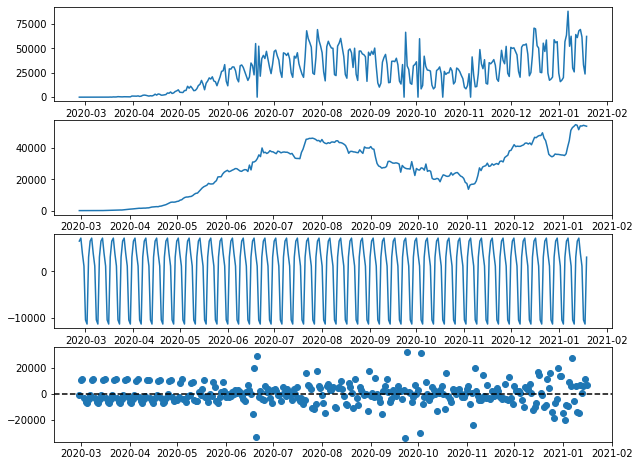

In [ ]:
novoscasos = brasil1.novoscasos
novoscasos.index = brasil1.observationdate

res = seasonal_decompose(novoscasos)

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(novoscasos.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

## Decompondo a série de confirmados



In [ ]:
confirmados = brasil1.confirmed
confirmados.index = brasil1.observationdate
confirmados

observationdate
2020-02-26          1.0
2020-02-27          1.0
2020-02-28          1.0
2020-02-29          2.0
2020-03-01          2.0
                ...    
2021-01-15    8393492.0
2021-01-16    8455059.0
2021-01-17    8488099.0
2021-01-18    8511770.0
2021-01-19    8573864.0
Name: confirmed, Length: 329, dtype: float64

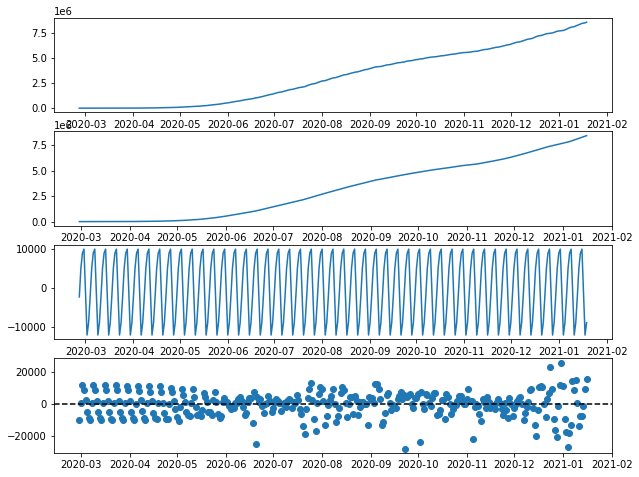

In [ ]:
'''para este gráfico precisamos de 4 coisas:
pontos observados = 
tendencia=
sazonalidade
ruído=
'''


#fazer a decomposição primeiro
res2 = seasonal_decompose(confirmados) #resido/ruído

#vamos plotar 4 graficos em uma figur só
#serão 4 séries e queremos tds juntas
fig, (ax1,ax2,ax3, ax4) = plt.subplots(4, 1,figsize=(10,8))
ax1.plot(res2.observed) #pontos observados
ax2.plot(res2.trend) #tendencia
ax3.plot(res2.seasonal) #sazonalidade
ax4.scatter(confirmados.index, res2.resid) #ruído
ax4.axhline(0, linestyle='dashed', c='black') #linha horizontal no 0
plt.show()

# Predizendo o número de casos confirmados com um AUTO-ARIMA

ARIMA significa média movel integrada autoregressiva. Serve para analise de séries temporais e tenta modelar o futuro olhando o passado.

Ele uma o pmdarima que não vem no pandas/ jupyter.  ele tem uma  função autoarima que ajusta a melhor modelagem arima que ele mesmo encontrar. Então não precisaremos setar na mão.

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 10.7MB/s 
     |████████████████████████████████| 2.1MB 33.1MB/s 
     |████████████████████████████████| 9.5MB 39.8MB/s 
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
modelo = auto_arima(confirmados)

In [ ]:
pd.date_range('2020-05-01', '2020-05-19')

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
#um grafico com o que aconteceu e as predições

#primeira camada
fig = go.Figure(go.Scatter(
    x=confirmados.index, y=confirmados, name='Observed'
))
#segunda camada, y é a previsão a ideia é ue fique uma linha perto da outra
fig.add_trace(go.Scatter(x=confirmados.index, y = modelo.predict_in_sample(), name='Predicted'))
#quanto maior o intervalo maior será a incerteza
#forecast previsão para frente
fig.add_trace(go.Scatter(x=pd.date_range('2021-01-20', '2021-01-31'), y=modelo.predict(11), name='Forecast'))

fig.update_layout(title='Previsão de casos confirmados para os próximos 11 dias',
                 yaxis_title='Casos confirmados', xaxis_title='Data')
fig.show()



Ele não conta variáveis exógenas,  como lockdown, vacina etc

# Forecasting com Facebook Prophet

In [ ]:
!conda install -c conda-forge fbprophet -y

Solving environment: done

## Package Plan ##

  environment location: /home/neylson/anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    pystan-2.19.0.0            |   py37h962f231_0        12.1 MB
    ------------------------------------------------------------
                                           Total:        15.1 MB

The following NEW packages will be INSTALLED:

  binutils_impl_lin~ pkgs/main/linux-64::binutils_impl_linux-64-2.33.1-he6710b0_7
  binutils_linux-64  conda-forge/linux-64::binutils_linux-64-2.33.1-h9595d00_17
  convertdate        conda-forge/noarch::convertdate-2.1.3-py_1000
  ephem              conda-forge/linux-64::ephem-3.7.7.1-py37h516909a_0
  fbprophet          conda-forge/linux-64::fbprophet-0.6-py37he1b5a44_0
  gcc_impl_linux-64  pk

## Modelo de crescimento

vamos prever quando a curva vai achatar, o momento de virada.

A biblioteca Prophet exige que façamos alguns pré processamentos nos dados.

In [ ]:
from fbprophet import Prophet

In [ ]:
# preparando os dados
#treinar o modelo
train = confirmados.reset_index()[:-5] #menos os cinco últimos
#testar
test = confirmados.reset_index()[-5:]#apenas os cinco  ultimos

# renomeia colunas --> obrigatório da biblioteca
train.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test.rename(columns={"observationdate":"ds","confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

#definir o modelo de crescimento --> crescimeno logistico
#preciso definir os pontos de virada olhando os gráficos anteriores
profeta = Prophet(growth="logistic", changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])

#pop = 1000000
#vamos pensar que toda a pop brasileira seria  contaminado
pop = 211463256 #https://www.ibge.gov.br/apps/populacao/projecao/box_popclock.php
train['cap'] = pop # cap de capacidade

# Treina o modelo
profeta.fit(train) #treina o modelo antes

# Construindo previsões para o futuro
future_dates = profeta.make_future_dataframe(periods=200) #200dias ahead
future_dates['cap'] = pop
forecast =  profeta.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=test.index, y=test, name='Observados - Teste'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()

Agora é se inteirar, continuar estudando e "pau na máquina"!!!